# Transformação de Fourier

> The most important numerical algorithm of our lifetime - Strang, Gilbert. "Wavelets". _[American Scientist](https://en.wikipedia.org/wiki/American_Scientist "American Scientist")_. **82** (3): 250–255. JSTOR" [29775194](https://www.jstor.org/stable/29775194).


$$
{\hat{f}}(\alpha) = \int_{-\infty}^{\infty} f(x) \cdot e^{-2 \pi i \alpha x},dx.
$$

Bem, essa equação me fascina. Então fiz esse notebook para explorar um pouco ela e aprofundar meus conhecimentos sobre.


Ela tem a capacidade de desatar nós! Com essa equação podemos decompor uma freqência qualquer em componentes trigonométicas.

## exemplo em python

Antes de tentar construir essa equação, precisamos de um exemplo para termos uma referência.

In [1]:
import numpy as np
from scipy.fft import fft,fftfreq
import matplotlib.pylab as plt

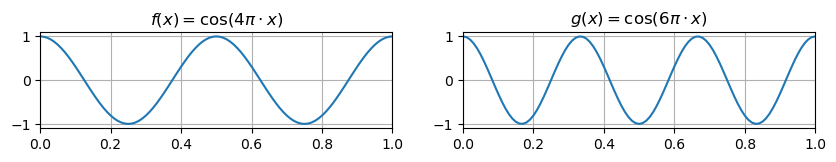

In [2]:
# criamos o domínio das funções

numero_de_pontos = 2 * pow(10,3)
espaco_entre_pontos = pow(10,-2)
x_inicial = 0.0
x_final = numero_de_pontos*espaco_entre_pontos
dominio = np.linspace(x_inicial,x_final, numero_de_pontos, endpoint=False)

# escolhendo as funcoes
# nossa funçao f está em 2Hz
contradominio_f = np.cos(4*np.pi*dominio)
# já nossa funçao g está em 3Hz
contradominio_g = np.cos(6*np.pi*dominio)

# imprimido os graficos
fig, axs = plt.subplots(1,2,figsize=(10, 1.25))


axs[0].set_title(r'$f(x)=\cos(4\pi\cdot x)$')
axs[0].plot(dominio, contradominio_f)
axs[0].set_xlim(0,1)
axs[0].grid()

axs[1].set_title(r'$g(x)=\cos(6\pi\cdot x)$')
axs[1].plot(dominio, contradominio_g)
axs[1].set_xlim(0,1)
axs[1].grid()

#dir(axs[0])

Para começarmos simples somaremos esses dois cossenos simples para usarmos nossa equação de fourier nessa noav

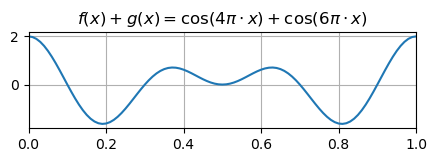

In [3]:
# somando as funções
contradominio_f_e_g = np.cos(4*np.pi*dominio) + np.cos(6*np.pi*dominio)

# imprimido o grafico
fig_2, ax_2 = plt.subplots(figsize=(5, 1.25))

ax_2.set_title(r'$f(x)+ g(x)=\cos(4\pi\cdot x)+\cos(6\pi\cdot x)$')
ax_2.plot(dominio, contradominio_f_e_g)
ax_2.set_xlim(0,1)
ax_2.grid()

agora com as soma das duas funçoes podemos testar nosso algortimo

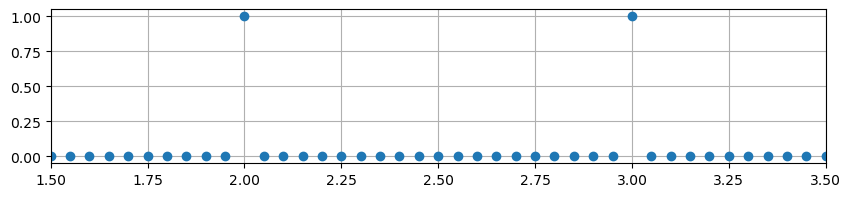

In [4]:
contradominito_fft = fft(contradominio_f_e_g)
dominio_fft = fftfreq(numero_de_pontos, espaco_entre_pontos)[:numero_de_pontos//2]


# imprimido o grafico
fig_fft, ax_fft = plt.subplots(figsize=(10, 2))
ax_fft.plot(
    dominio_fft, 
    2.0/numero_de_pontos * np.abs(contradominito_fft[0:numero_de_pontos//2]),
    'o'
)
ax_fft.set_xlim(1.5,3.5)
ax_fft.grid()
fig_fft.show()

# continua...